<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day19Notes_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 19 Code: Multilayer Perceptrons with Sklearn

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#Get Dataset
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')
predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

print(train_data.head())
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_data[0:5]

     sepal length  sepal width  petal length  petal width
79            5.7          2.6           3.5          1.0
54            6.5          2.8           4.6          1.5
106           4.9          2.5           4.5          1.7
90            5.5          2.6           4.4          1.2
145           6.7          3.0           5.2          2.3


array([[-0.18688501, -1.09883199, -0.14183598, -0.25284018],
       [ 0.77252466, -0.6472572 ,  0.47403077,  0.39546797],
       [-1.14629467, -1.32461939,  0.41804288,  0.65479123],
       [-0.42673742, -1.09883199,  0.362055  ,  0.00648308],
       [ 1.01237707, -0.19568241,  0.80995808,  1.43276101]])

## Build out a Multilayer Perceptron using Scikit-Learn:
Here are the links to the documentation: 
- [sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
- [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [24]:
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica']) #these labels might not be in the correct order.
  else:
    print(cf_matrix)

Accuracy:  0.9


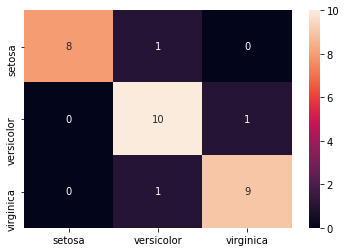

In [26]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data,train_sln)
predictions = mlp.predict(test_data)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))
print_confusion_matrix(test_sln, predictions, True)

## In-Class Exercise:

**Code Driver**: Person with a pet who's name is first alphbetically

1. Read in the Boston Housing dataset
2. Normalize your data
3. Use a MLPRegressor to predict the price of a house 'MEDV'

In [ ]:
# Your code goes here for the In-Class Exercise

